In [53]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [293]:
X = pd.read_csv("./X.csv",header=None)

In [294]:
y = pd.read_csv("./y.csv",header=None)

In [35]:
def split_data(X, y):
    #return: list with 10 dataframes that contain X+y
    X["y"] = y
    shuffled = X.sample(frac=1, random_state=1)
    result = np.array_split(shuffled, 10)
    return result

In [6]:
def get_pi (train_df):
    return np.mean(train_df["y"])

In [9]:
def get_lambda (column):
    #takes one column d, returns lambda for that column
    #column should be of only class y
    return (np.sum(column) + 1) / (len(column) + 1)

In [10]:
def predictions(train_df, test_df):
    bern = get_pi(train_df)

    df_for_class_0 = train_df[train_df['y'] == 0]
    df_for_class_1 = train_df[train_df['y'] == 1]

    lambdas_1 = []
    for (columnName, columnData) in df_for_class_1.iteritems():
        lambda_col = get_lambda(columnData)
        lambdas_1.append(lambda_col)

    lambdas_0 = []
    for (columnName, columnData) in df_for_class_0.iteritems():
        lambda_col = get_lambda(columnData)
        lambdas_0.append(lambda_col)

    y_test = test_df["y"]
    x_test = test_df.drop(columns="y")
#     print(x_test)

    pred_y = []
    for i in range(len(x_test)):
        row = x_test.iloc[i]

        # calc for class 0

        product = 1
        for j in range(len(row)):
            lam = lambdas_0[j]
            temp = math.exp(-lam) * (lam ** row[j])
            product = temp * product
        value_0 = bern * product

        # calc for class 1

        product = 1
        for j in range(len(row)):
            lam = lambdas_1[j]
            temp = math.exp(-lam) * (lam ** row[j])
            product = temp * product
        value_1 = bern * product

        if value_0 > value_1:
            pred_y.append(0)
        else:
            pred_y.append(1)

    return pred_y

In [40]:
def combine_tests(split_df):
    #takes in result of split_data
    tn_c = 0
    fp_c = 0
    fn_c = 0
    tp_c = 0
    
    for i in range(len(split_df)): #1-10
        counter = [0,1,2,3,4,5,6,7,8,9]
        test = split_df[i]
        
        train_list = np.delete(counter, i)
        train = split_df[train_list[0]]
        
        bern_prior = get_pi(train)
        train_list = np.delete(train_list, 0)
        for j in train_list:

            train = train.append(split_df[j])
        
        #running test
        y_pred = predictions(train, test)
        y_actual = test["y"]
        
        CM = confusion_matrix(y_actual, y_pred)
        tn, fp, fn, tp = CM.ravel()
        tn_c = tn_c + tn
        fp_c = fp_c + fp
        fn_c = fn_c + fn
        tp_c = tp_c + tp
    return [[tn_c, fp_c],[fn_c, tp_c]]

In [41]:
df = split_data(X, y)
combine_tests(df)

<ipython-input-10-37cb03bdbd8c>:30: RuntimeWarning: overflow encountered in double_scalars
  temp = math.exp(-lam) * (lam ** row[j])
<ipython-input-10-37cb03bdbd8c>:30: RuntimeWarning: overflow encountered in double_scalars
  temp = math.exp(-lam) * (lam ** row[j])
<ipython-input-10-37cb03bdbd8c>:30: RuntimeWarning: overflow encountered in double_scalars
  temp = math.exp(-lam) * (lam ** row[j])


[[2289, 498], [99, 1714]]

## part b

In [88]:
def lambda_parameters(train_df, test_df):
    bern = get_pi(train_df)

    df_for_class_0 = train_df[train_df['y'] == 0]
    df_for_class_1 = train_df[train_df['y'] == 1]
    
    df_for_class_1 = df_for_class_1.drop(columns="y")
    lambdas_1 = []
    for (columnName, columnData) in df_for_class_1.iteritems():
        lambda_col = get_lambda(columnData)
        lambdas_1.append(lambda_col)
    
    df_for_class_0 = df_for_class_0.drop(columns="y")
    lambdas_0 = []
    for (columnName, columnData) in df_for_class_0.iteritems():
        lambda_col = get_lambda(columnData)
        lambdas_0.append(lambda_col)
    
    return lambdas_0, lambdas_1

In [89]:
def show_lambdas(split_df):
    #takes in result of split_data
    arr0 = []
    arr1 = []
    for i in range(len(split_df)): #1-10
        counter = [0,1,2,3,4,5,6,7,8,9]
        test = split_df[i]
#         print("test index",i)
        
        train_list = np.delete(counter, i)
        train = split_df[train_list[0]]
        
        bern_prior = get_pi(train)
#         print("trainList", train_list)
        train_list = np.delete(train_list, 0)
        for j in train_list:

            train = train.append(split_df[j])
#             print("appended", j)
        
        lam_0, lam_1 = lambda_parameters(train, test)
        arr0.append(lam_0)
        arr1.append(lam_1)
    l_0 = np.mean(arr0, axis=0)
    l_1 = np.mean(arr1, axis=0)
    return l_0, l_1

In [90]:
class_0L, class_1L = show_lambdas(df)

<StemContainer object of 3 artists>

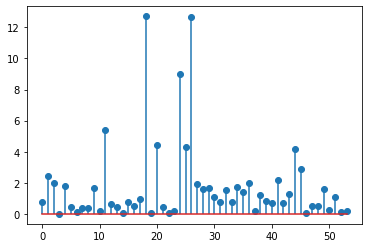

In [91]:
x = np.arange(54)
y = class_0L
plt.stem(x, y)

<StemContainer object of 3 artists>

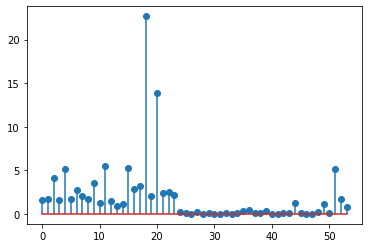

In [92]:
y_1 = class_1L
plt.stem(x, y_1)

## part c

In [235]:
result = split_data(X, y)
train = result[0].append(result[1]).append(result[2]).append(result[3]).append(result[4]).append(result[5]).append(result[6]).append(result[7]).append(result[8])
test = result[9]

In [237]:
train.loc[(train.y == 0),'y']=-1

In [154]:
y_train = pd.DataFrame(train["y"])
X_train = train.drop(columns="y")

In [157]:
def sigmoid (link_fxn):
    return np.exp(link_fxn) / (1+np.exp(link_fxn))

In [158]:
w = np.zeros(X_train.shape[1])

In [179]:
def L(X, y, w):
    #objective training function
    #take in X_train and y_train df
    sum = 0
    for i in range(len(y["y"])):
        link_fxn = np.dot(X.iloc[i].T, w)
        if y["y"].iloc[i] == 1:
            sum = sum + np.log(sigmoid(link_fxn))
        else:
            sum = sum + np.log(1 - sigmoid(link_fxn))
    return sum
            

In [191]:
def sigmoid_helper(X_row, y_value, w):
    link_fxn = np.dot(X_row.T, w)
    if y_value == 1:
        return sigmoid(link_fxn)
    else:
        return 1 - sigmoid(link_fxn)

In [212]:
def logistic_regression(X, y, iterations=1000, step_size=0.01/4600):
    w = np.zeros(X.shape[1])
    L_funcs = []
    for iteration in range(iterations):
        l = L(X, y, w)
        L_funcs.append(l)
        
        
        gradient = np.zeros(X.shape[1])
        for i in range(len(y["y"])):
            y_i = y["y"].iloc[i]
            x_i = X.iloc[i]
            sum_temp = (1-sigmoid_helper(x_i, y_i, w)) * y_i * x_i
            gradient = gradient + sum_temp
        w = w + step_size * gradient
        if iteration % 25 == 0:
            print("finished iteration:", iteration)
    return w, L_funcs

In [204]:
w_9, l_funcs_9 = logistic_regression(X_train, y_train, 600)

finished iteration: 0
finished iteration: 25
finished iteration: 50
finished iteration: 75
finished iteration: 100
finished iteration: 125
finished iteration: 150
finished iteration: 175
finished iteration: 200
finished iteration: 225
finished iteration: 250
finished iteration: 275
finished iteration: 300
finished iteration: 325
finished iteration: 350
finished iteration: 375
finished iteration: 400
finished iteration: 425
finished iteration: 450
finished iteration: 475
finished iteration: 500
finished iteration: 525
finished iteration: 550
finished iteration: 575


In [214]:
train = result[0].append(result[1]).append(result[2]).append(result[3]).append(result[4]).append(result[5]).append(result[6]).append(result[7]).append(result[9])
train.loc[(train.y == 0),'y']=-1
test = result[8]

y_train = pd.DataFrame(train["y"])
X_train = train.drop(columns="y")
w_8, l_funcs_8 = logistic_regression(X_train, y_train, 600)

finished iteration: 0
finished iteration: 25
finished iteration: 50
finished iteration: 75
finished iteration: 100
finished iteration: 125
finished iteration: 150
finished iteration: 175
finished iteration: 200
finished iteration: 225
finished iteration: 250
finished iteration: 275
finished iteration: 300
finished iteration: 325
finished iteration: 350
finished iteration: 375
finished iteration: 400
finished iteration: 425
finished iteration: 450
finished iteration: 475
finished iteration: 500
finished iteration: 525
finished iteration: 550
finished iteration: 575


In [215]:
train = result[0].append(result[1]).append(result[2]).append(result[3]).append(result[4]).append(result[5]).append(result[6]).append(result[8]).append(result[9])
train.loc[(train.y == 0),'y']=-1
test = result[7]

y_train = pd.DataFrame(train["y"])
X_train = train.drop(columns="y")
w_7, l_funcs_7 = logistic_regression(X_train, y_train, 600)

finished iteration: 0
finished iteration: 25
finished iteration: 50
finished iteration: 75
finished iteration: 100
finished iteration: 125
finished iteration: 150
finished iteration: 175
finished iteration: 200
finished iteration: 225
finished iteration: 250
finished iteration: 275
finished iteration: 300
finished iteration: 325
finished iteration: 350
finished iteration: 375
finished iteration: 400
finished iteration: 425
finished iteration: 450
finished iteration: 475
finished iteration: 500
finished iteration: 525
finished iteration: 550
finished iteration: 575


In [216]:
train = result[0].append(result[1]).append(result[2]).append(result[3]).append(result[4]).append(result[5]).append(result[7]).append(result[8]).append(result[9])
train.loc[(train.y == 0),'y']=-1
test = result[6]

y_train = pd.DataFrame(train["y"])
X_train = train.drop(columns="y")
w_6, l_funcs_6 = logistic_regression(X_train, y_train, 600)

finished iteration: 0
finished iteration: 25
finished iteration: 50
finished iteration: 75
finished iteration: 100
finished iteration: 125
finished iteration: 150
finished iteration: 175
finished iteration: 200
finished iteration: 225
finished iteration: 250
finished iteration: 275
finished iteration: 300
finished iteration: 325
finished iteration: 350
finished iteration: 375
finished iteration: 400
finished iteration: 425
finished iteration: 450
finished iteration: 475
finished iteration: 500
finished iteration: 525
finished iteration: 550
finished iteration: 575


In [217]:
train = result[0].append(result[1]).append(result[2]).append(result[3]).append(result[4]).append(result[6]).append(result[7]).append(result[8]).append(result[9])
train.loc[(train.y == 0),'y']=-1
test = result[5]

y_train = pd.DataFrame(train["y"])
X_train = train.drop(columns="y")
w_5, l_funcs_5 = logistic_regression(X_train, y_train, 600)

finished iteration: 0


KeyboardInterrupt: 

In [ ]:
train = result[0].append(result[1]).append(result[2]).append(result[3]).append(result[5]).append(result[6]).append(result[7]).append(result[8]).append(result[9])
train.loc[(train.y == 0),'y']=-1
test = result[4]

y_train = pd.DataFrame(train["y"])
X_train = train.drop(columns="y")
w_4, l_funcs_4 = logistic_regression(X_train, y_train, 600)

In [ ]:
train = result[0].append(result[1]).append(result[2]).append(result[4]).append(result[5]).append(result[6]).append(result[7]).append(result[8]).append(result[9])
train.loc[(train.y == 0),'y']=-1
test = result[3]

y_train = pd.DataFrame(train["y"])
X_train = train.drop(columns="y")
w_3, l_funcs_3 = logistic_regression(X_train, y_train, 600)

In [ ]:
train = result[0].append(result[1]).append(result[3]).append(result[4]).append(result[5]).append(result[6]).append(result[7]).append(result[8]).append(result[9])
train.loc[(train.y == 0),'y']=-1
test = result[2]

y_train = pd.DataFrame(train["y"])
X_train = train.drop(columns="y")
w_2, l_funcs_2 = logistic_regression(X_train, y_train, 600)

In [222]:
train = result[0].append(result[2]).append(result[3]).append(result[4]).append(result[5]).append(result[6]).append(result[7]).append(result[8]).append(result[9])
train.loc[(train.y == 0),'y']=-1
test = result[1]

y_train = pd.DataFrame(train["y"])
X_train = train.drop(columns="y")
w_1, l_funcs_1 = logistic_regression(X_train, y_train, 600)

finished iteration: 0
finished iteration: 25
finished iteration: 50
finished iteration: 75
finished iteration: 100
finished iteration: 125


KeyboardInterrupt: 

In [220]:
train = result[1].append(result[2]).append(result[3]).append(result[4]).append(result[5]).append(result[6]).append(result[7]).append(result[8]).append(result[9])
train.loc[(train.y == 0),'y']=-1
test = result[0]

y_train = pd.DataFrame(train["y"])
X_train = train.drop(columns="y")
w_0, l_funcs_0 = logistic_regression(X_train, y_train, 600)

finished iteration: 0
finished iteration: 25
finished iteration: 50
finished iteration: 75
finished iteration: 100
finished iteration: 125
finished iteration: 150
finished iteration: 175
finished iteration: 200
finished iteration: 225
finished iteration: 250
finished iteration: 275
finished iteration: 300
finished iteration: 325
finished iteration: 350
finished iteration: 375
finished iteration: 400
finished iteration: 425
finished iteration: 450
finished iteration: 475
finished iteration: 500
finished iteration: 525
finished iteration: 550
finished iteration: 575


NameError: name 'ax' is not defined

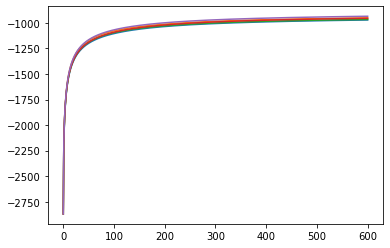

In [229]:
x_iter = np.linspace(0, 600, 600)
plt.plot(x_iter, l_funcs_9)
plt.plot(x_iter, l_funcs_8)
plt.plot(x_iter, l_funcs_7)
plt.plot(x_iter, l_funcs_6)
plt.plot(x_iter, l_funcs_5)
plt.plot(x_iter, l_funcs_4)
plt.plot(x_iter, l_funcs_3)
plt.plot(x_iter, l_funcs_2)
plt.plot(x_iter, l_funcs_1)
plt.plot(x_iter, l_funcs_0)

faster method

In [259]:
X["y"] = y
X.loc[(X.y == 0),'y']=-1

y = X["y"]
X = X.drop(columns="y")

,0
0,1
1,1
2,1
3,1
4,1
...,...
4595,-1
4596,-1
4597,-1
4598,-1


In [350]:
def sigmoid(x, y, w):
    sigma = math.exp(np.dot(x.T, w)) / (1 + math.exp(np.dot(x.T, w)))
    if y == 1:
        return sigm
    else:
        return 1 - sigm
    
obj_funcs = []
for i in range(10):
    x_test = X[(460*i):(460*(i+1))]
    x_train = np.concatenate((X[0:(460*i)], X[(460*(i+1)):]), axis=0)
    y_test = y[(460*i):(460*(i+1))]
    y_train = np.concatenate((y[0:(460*i)], y[(460*(i+1)):]), axis=0)
    
    L = []
    w = np.zeros(x_train.shape[1])
    for i in range(1000):
        sum_l = 0
        sum_delta = 0
        for i in range(len(x_train)):
            sigma = sigmoid(x_train[i], y_train[i],w)
            sum_l += math.log(sigma)
            gradient = (1 - sigma) * y_train[i][0] * x_train[i]
        
            sum_delta += gradient
        L.append(sum_l)
        
        w_t1 = w + 0.01/4600 * sum_delta
        w=w_t1
    print("did one test:", i)
    obj_funcs.append(L)

KeyboardInterrupt: 

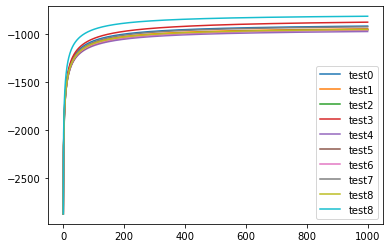

In [292]:
x = np.arange(1000)
plt.plot(x_iter, obj_funcs[0],label="test0")
plt.plot(x_iter, obj_funcs[1],label="test1")
plt.plot(x_iter, obj_funcs[2],label="test2")
plt.plot(x_iter, obj_funcs[3],label="test3")
plt.plot(x_iter, obj_funcs[4],label="test4")
plt.plot(x_iter, obj_funcs[5],label="test5")
plt.plot(x_iter, obj_funcs[6],label="test6")
plt.plot(x_iter, obj_funcs[7],label="test7")
plt.plot(x_iter, obj_funcs[8],label="test8")
plt.plot(x_iter, obj_funcs[9],label="test8")
plt.legend()

## d. newton

In [438]:
TP = 0
FP = 0
TN = 0
FN = 0

obj_funcs = []
for i in range(10):
    x_test = X[(460*i):(460*(i+1))]
    x_train = np.concatenate((X[0:(460*i)], X[(460*(i+1)):]), axis=0)
    y_test = y[(460*i):(460*(i+1))]
    y_train = np.concatenate((y[0:(460*i)], y[(460*(i+1)):]), axis=0)
    
    L = []
    w = np.zeros(x_train.shape[1])
    for k in range(100):
        
        sum_l = 0
        delta_sum = 0
        num_total = 0
        dem_total = 0
        
        for j in range(len(x_train)):  
            sigma = sigmoid(x_train[j], y_train[j],w)
            L= math.log(sigma)
            sum_l += L

            #new
            num = (1-sigma)*y_train[j][0] * x_train[j]
            num_total += num

            dem = (sigma**2-sigma)* y_train[j][0]**2 * np.dot(x_train[j], x_train[j].T)
            dem_total += dem

        delta_sum = -1 * num_total / dem_total
        L.append(sum_l)
        w += delta_sum 
         
    #test accuracy
    pred = []
    for r in range(len(x_test)):
        row = x_test.iloc[r]
        prediction = math.exp(np.dot(row, w)) / (1+math.exp(np.dot(row, w)))
        pred.append(prediction)
             
    actual = y_test.iloc[:,0]   
    for v in range(len(pred)):
        if pred[v] > 0.5: #predicted true
            if actual.iloc[v] == 1:
                TP += 1
            else:
                FP += 1
        else: #predicted fasle
            if actual.iloc[v] == -1: 
                TN += 1
            else:
                FN += 1
    print("did one test:", i)
    obj_funcs.append(L)

did one test: 0
did one test: 1
did one test: 2
did one test: 3
did one test: 4
did one test: 5
did one test: 6
did one test: 7
did one test: 8
did one test: 9


In [439]:
TP, TN, FP, FN

(1639, 2393, 394, 174)

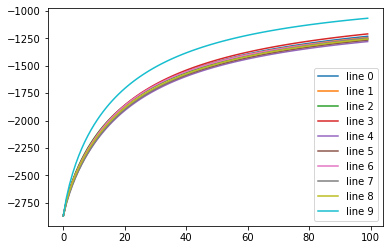

In [401]:
x = np.arange(100)

for i in range(10):
    plt.plot(x, obj_funcs[i], label = f'line {i}')
plt.legend()
plt.show()